In [4]:
!pip install lightgbm

     ---------------------------------------- 1.4/1.4 MB 2.8 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.impute import SimpleImputer
import seaborn as sns
import statistics as st
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [7]:
train=pd.read_csv('D://Kaggle competition//train1.csv')
test=pd.read_csv('D://Kaggle competition//test1.csv')

## Data Preparation and Cleaning

In [6]:
train.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [8]:
train.shape

(1200000, 21)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [16]:
test.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House


In [13]:
test.shape

(800000, 20)

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   787511 non-null  float64
 2   Gender                800000 non-null  object 
 3   Annual Income         770140 non-null  float64
 4   Marital Status        787664 non-null  object 
 5   Number of Dependents  726870 non-null  float64
 6   Education Level       800000 non-null  object 
 7   Occupation            560875 non-null  object 
 8   Health Score          750551 non-null  float64
 9   Location              800000 non-null  object 
 10  Policy Type           800000 non-null  object 
 11  Previous Claims       557198 non-null  float64
 12  Vehicle Age           799997 non-null  float64
 13  Credit Score          708549 non-null  float64
 14  Insurance Duration    799998 non-null  float64
 15  

In [3]:
train.isnull().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [19]:
train.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.200000e+06,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,5.999995e+05,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,3.464103e+05,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,2.999998e+05,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,5.999995e+05,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,8.999992e+05,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,1.199999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [8]:
train['Policy Start Date']=pd.to_datetime(train['Policy Start Date'],format='%Y-%m-%d %H:%M:%S')
test['Policy Start Date']=pd.to_datetime(test['Policy Start Date'],format='%Y-%m-%d %H:%M:%S')


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   id                    1200000 non-null  int64         
 1   Age                   1181295 non-null  float64       
 2   Gender                1200000 non-null  object        
 3   Annual Income         1155051 non-null  float64       
 4   Marital Status        1181471 non-null  object        
 5   Number of Dependents  1090328 non-null  float64       
 6   Education Level       1200000 non-null  object        
 7   Occupation            841925 non-null   object        
 8   Health Score          1125924 non-null  float64       
 9   Location              1200000 non-null  object        
 10  Policy Type           1200000 non-null  object        
 11  Previous Claims       835971 non-null   float64       
 12  Vehicle Age           1199994 non-null  fl

In [9]:
train['Policy Start_Date']=train['Policy Start Date'].dt.date


In [10]:
test['Policy Start_Date']=test['Policy Start Date'].dt.date

In [33]:
train.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Policy Start_Date
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0,2023-12-23
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0,2023-06-12
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0,2023-09-30
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0,2024-06-12
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0,2021-12-01


In [6]:
test.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Policy Start_Date
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,...,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House,2023-06-04
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,...,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment,2024-04-22
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,...,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo,2023-04-05
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,...,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House,2023-10-25
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,...,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House,2021-11-26


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   id                    1200000 non-null  int64         
 1   Age                   1181295 non-null  float64       
 2   Gender                1200000 non-null  object        
 3   Annual Income         1155051 non-null  float64       
 4   Marital Status        1181471 non-null  object        
 5   Number of Dependents  1090328 non-null  float64       
 6   Education Level       1200000 non-null  object        
 7   Occupation            841925 non-null   object        
 8   Health Score          1125924 non-null  float64       
 9   Location              1200000 non-null  object        
 10  Policy Type           1200000 non-null  object        
 11  Previous Claims       835971 non-null   float64       
 12  Vehicle Age           1199994 non-null  fl

In [6]:
train.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Policy Start_Date
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0,2023-12-23
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0,2023-06-12
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0,2023-09-30
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0,2024-06-12
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0,2021-12-01


In [11]:

train.drop(columns=['Policy Start Date'],inplace=True)
test.drop(columns=['Policy Start Date'],inplace=True)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [7]:
train.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Policy Start_Date
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,Poor,No,Weekly,House,2869.0,2023-12-23
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,Average,Yes,Monthly,House,1483.0,2023-06-12
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,Good,Yes,Weekly,House,567.0,2023-09-30
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,Poor,Yes,Daily,Apartment,765.0,2024-06-12
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,Poor,Yes,Weekly,House,2022.0,2021-12-01


In [8]:
test.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Policy Start_Date
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,Poor,Yes,Weekly,House,2023-06-04
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,Good,Yes,Rarely,Apartment,2024-04-22
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,Average,Yes,Monthly,Condo,2023-04-05
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,Poor,Yes,Daily,House,2023-10-25
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,Average,No,Weekly,House,2021-11-26


In [12]:
train['Health Score']=round(train['Health Score'],3)
test['Health Score']=round(test['Health Score'],3)

In [12]:
train.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Policy Start_Date,Policy Start_Time
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.599,Urban,...,17.0,372.0,5.0,Poor,No,Weekly,House,2869.0,2023-12-23,15:21:39.134960
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.570,Rural,...,12.0,694.0,2.0,Average,Yes,Monthly,House,1483.0,2023-06-12,15:21:39.111551
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.178,Suburban,...,14.0,NaN,3.0,Good,Yes,Weekly,House,567.0,2023-09-30,15:21:39.221386
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938,Rural,...,0.0,367.0,1.0,Poor,Yes,Daily,Apartment,765.0,2024-06-12,15:21:39.226954
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376,Rural,...,8.0,598.0,4.0,Poor,Yes,Weekly,House,2022.0,2021-12-01,15:21:39.252145


In [13]:
train.isnull().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
Policy Start_Date            0
Policy Start_Time            0
dtype: int64

In [10]:
train.head(50)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Policy Start_Date
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,Poor,No,Weekly,House,2869.0,2023-12-23
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,Average,Yes,Monthly,House,1483.0,2023-06-12
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,Good,Yes,Weekly,House,567.0,2023-09-30
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,Poor,Yes,Daily,Apartment,765.0,2024-06-12
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,Poor,Yes,Weekly,House,2022.0,2021-12-01
5,5,29.0,Male,45963.0,Married,1.0,Bachelor's,NaN,33.053198,Urban,...,2.0,4.0,614.0,5.0,Average,No,Weekly,House,3202.0,2022-05-20
6,6,41.0,Male,40336.0,Married,0.0,PhD,NaN,NaN,Rural,...,2.0,8.0,807.0,6.0,Poor,No,Weekly,House,439.0,2020-02-21
7,7,48.0,Female,127237.0,Divorced,2.0,High School,Employed,5.769783,Suburban,...,1.0,11.0,398.0,5.0,Average,No,Rarely,Condo,111.0,2022-08-08
8,8,21.0,Male,1733.0,Divorced,3.0,Bachelor's,NaN,17.869551,Urban,...,1.0,10.0,685.0,8.0,Average,No,Monthly,Condo,213.0,2020-12-14
9,9,44.0,Male,52447.0,Married,2.0,Master's,Employed,20.473718,Urban,...,1.0,9.0,635.0,3.0,Poor,No,Daily,Condo,64.0,2020-08-02


In [18]:
train.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.200000e+06,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,5.999995e+05,4.114556e+01,3.274522e+04,2.009934e+00,2.561393e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,3.464103e+05,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,2.012000e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,2.999998e+05,3.000000e+01,8.001000e+03,1.000000e+00,1.591900e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,5.999995e+05,4.100000e+01,2.391100e+04,2.000000e+00,2.457900e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,8.999992e+05,5.300000e+01,4.463400e+04,3.000000e+00,3.452700e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,1.199999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897600e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [13]:
train.shape

(384004, 21)

In [16]:
test.isnull().sum()

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Policy Start_Date       0
dtype: int64

In [15]:
test.shape

(255358, 20)

In [13]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(train.iloc[:,[1,5,8,11]].values)
train.iloc[:,[1,5,8,11]]=imputer.transform(train.iloc[:,[1,5,8,11]].values)

In [14]:
imputertest=SimpleImputer(missing_values=np.nan,strategy='mean')
imputertest.fit(test.iloc[:,[1,5,8,11]].values)
test.iloc[:,[1,5,8,11]]=imputertest.transform(test.iloc[:,[1,5,8,11]].values)

In [15]:
train['Number of Dependents']=round(train['Number of Dependents'],0)
test['Number of Dependents']=round(test['Number of Dependents'],0)

In [17]:
train.head(50)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Policy Start_Date
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,Poor,No,Weekly,House,2869.0,2023-12-23
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,Poor,Yes,Weekly,House,2022.0,2021-12-01
7,7,48.0,Female,127237.0,Divorced,2.0,High School,Employed,5.769783,Suburban,...,1.0,11.0,398.0,5.0,Average,No,Rarely,Condo,111.0,2022-08-08
9,9,44.0,Male,52447.0,Married,2.0,Master's,Employed,20.473718,Urban,...,1.0,9.0,635.0,3.0,Poor,No,Daily,Condo,64.0,2020-08-02
15,15,18.0,Male,6076.0,Married,2.0,High School,Employed,7.442964,Urban,...,1.0,12.0,584.0,5.0,Good,Yes,Monthly,Apartment,849.0,2020-10-17
17,17,34.0,Female,45907.0,Divorced,4.0,High School,Self-Employed,24.059639,Suburban,...,0.0,0.0,694.0,8.0,Poor,Yes,Daily,Condo,643.0,2020-12-27
19,19,40.0,Female,123751.0,Single,2.0,Master's,Self-Employed,24.955316,Suburban,...,0.0,8.0,420.0,2.0,Good,Yes,Rarely,Condo,40.0,2020-06-25
25,25,19.0,Male,72482.0,Married,2.0,Bachelor's,Unemployed,27.279416,Suburban,...,0.0,17.0,416.0,3.0,Good,Yes,Weekly,Condo,671.0,2021-03-10
27,27,42.0,Male,35123.0,Married,2.0,Bachelor's,Self-Employed,31.391907,Suburban,...,0.0,3.0,486.0,4.0,Good,Yes,Rarely,Condo,2680.0,2023-09-03
32,32,58.0,Male,1288.0,Divorced,4.0,Master's,Self-Employed,15.171629,Urban,...,1.0,2.0,803.0,2.0,Good,No,Rarely,Apartment,3299.0,2023-07-25


In [16]:
train['Previous Claims']=round(train['Previous Claims'],0)
test['Previous Claims']=round(test['Previous Claims'],0)


In [36]:
train.head(50)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Policy Start_Date,Policy Start_Time
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.599000,Urban,...,17.0,372.0,5.0,Poor,No,Weekly,House,2869.0,2023-12-23,15:21:39.134960
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.570000,Rural,...,12.0,694.0,2.0,Average,Yes,Monthly,House,1483.0,2023-06-12,15:21:39.111551
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.178000,Suburban,...,14.0,NaN,3.0,Good,Yes,Weekly,House,567.0,2023-09-30,15:21:39.221386
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938000,Rural,...,0.0,367.0,1.0,Poor,Yes,Daily,Apartment,765.0,2024-06-12,15:21:39.226954
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376000,Rural,...,8.0,598.0,4.0,Poor,Yes,Weekly,House,2022.0,2021-12-01,15:21:39.252145
5,5,29.0,Male,45963.0,Married,1.0,Bachelor's,NaN,33.053000,Urban,...,4.0,614.0,5.0,Average,No,Weekly,House,3202.0,2022-05-20,15:21:39.207847
6,6,41.0,Male,40336.0,Married,0.0,PhD,NaN,25.613927,Rural,...,8.0,807.0,6.0,Poor,No,Weekly,House,439.0,2020-02-21,15:21:39.219432
7,7,48.0,Female,127237.0,Divorced,2.0,High School,Employed,5.770000,Suburban,...,11.0,398.0,5.0,Average,No,Rarely,Condo,111.0,2022-08-08,15:21:39.181605
8,8,21.0,Male,1733.0,Divorced,3.0,Bachelor's,NaN,17.870000,Urban,...,10.0,685.0,8.0,Average,No,Monthly,Condo,213.0,2020-12-14,15:21:39.198406
9,9,44.0,Male,52447.0,Married,2.0,Master's,Employed,20.474000,Urban,...,9.0,635.0,3.0,Poor,No,Daily,Condo,64.0,2020-08-02,15:21:39.144722


In [38]:
train.isna().sum()

id                           0
Age                          0
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents         0
Education Level              0
Occupation              358075
Health Score                 0
Location                     0
Policy Type                  0
Previous Claims              0
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
Policy Start_Date            0
Policy Start_Time            0
dtype: int64

In [17]:
impute=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
impute.fit(train.iloc[:,[4]].values)
train.iloc[:,[4]]=impute.transform(train.iloc[:,[4]].values)

In [18]:
imputetest=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputetest.fit(test.iloc[:,[4]].values)
test.iloc[:,[4]]=impute.transform(test.iloc[:,[4]].values)

In [20]:
test.isnull().sum()

id                           0
Age                          0
Gender                       0
Annual Income            29860
Marital Status               0
Number of Dependents         0
Education Level              0
Occupation              239125
Health Score                 0
Location                     0
Policy Type                  0
Previous Claims              0
Vehicle Age                  3
Credit Score             91451
Insurance Duration           2
Customer Feedback        52276
Smoking Status               0
Exercise Frequency           0
Property Type                0
Policy Start_Date            0
dtype: int64

In [19]:
train['Occupation']=train['Occupation'].fillna('Self-Employed')
test['Occupation']=test['Occupation'].fillna('Self-Employed')

In [18]:
train.head(10)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Policy Start_Date
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.599000,Urban,...,2.0,17.0,372.0,5.0,Poor,No,Weekly,House,2869.0,2023-12-23
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,Self-Employed,15.570000,Rural,...,1.0,12.0,694.0,2.0,Average,Yes,Monthly,House,1483.0,2023-06-12
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.178000,Suburban,...,1.0,14.0,NaN,3.0,Good,Yes,Weekly,House,567.0,2023-09-30
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,Self-Employed,10.938000,Rural,...,1.0,0.0,367.0,1.0,Poor,Yes,Daily,Apartment,765.0,2024-06-12
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376000,Rural,...,0.0,8.0,598.0,4.0,Poor,Yes,Weekly,House,2022.0,2021-12-01
5,5,29.0,Male,45963.0,Married,1.0,Bachelor's,Self-Employed,33.053000,Urban,...,2.0,4.0,614.0,5.0,Average,No,Weekly,House,3202.0,2022-05-20
6,6,41.0,Male,40336.0,Married,0.0,PhD,Self-Employed,25.613927,Rural,...,2.0,8.0,807.0,6.0,Poor,No,Weekly,House,439.0,2020-02-21
7,7,48.0,Female,127237.0,Divorced,2.0,High School,Employed,5.770000,Suburban,...,1.0,11.0,398.0,5.0,Average,No,Rarely,Condo,111.0,2022-08-08
8,8,21.0,Male,1733.0,Divorced,3.0,Bachelor's,Self-Employed,17.870000,Urban,...,1.0,10.0,685.0,8.0,Average,No,Monthly,Condo,213.0,2020-12-14
9,9,44.0,Male,52447.0,Married,2.0,Master's,Employed,20.474000,Urban,...,1.0,9.0,635.0,3.0,Poor,No,Daily,Condo,64.0,2020-08-02


In [20]:
test.head(10)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Policy Start_Date
0,1200000,28.0,Female,2310.0,Single,4.0,Bachelor's,Self-Employed,7.658,Rural,Basic,1.0,19.0,NaN,1.0,Poor,Yes,Weekly,House,2023-06-04
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381,Suburban,Premium,1.0,14.0,372.0,8.0,Good,Yes,Rarely,Apartment,2024-04-22
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.355,Urban,Comprehensive,1.0,16.0,819.0,9.0,Average,Yes,Monthly,Condo,2023-04-05
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136,Suburban,Comprehensive,1.0,3.0,770.0,5.0,Poor,Yes,Daily,House,2023-10-25
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844,Suburban,Premium,1.0,14.0,755.0,7.0,Average,No,Weekly,House,2021-11-26
5,1200005,43.0,Male,52370.0,Married,2.0,Bachelor's,Self-Employed,5.386,Suburban,Basic,1.0,15.0,432.0,2.0,NaN,No,Rarely,Condo,2022-07-08
6,1200006,21.0,Female,5896.0,Married,3.0,Master's,Self-Employed,14.774,Rural,Comprehensive,1.0,14.0,321.0,8.0,Good,No,Monthly,Condo,2023-11-12
7,1200007,44.0,Male,31855.0,Divorced,3.0,Bachelor's,Self-Employed,20.848,Suburban,Premium,1.0,8.0,712.0,1.0,Poor,Yes,Monthly,Apartment,2021-03-12
8,1200008,32.0,Female,76463.0,Divorced,4.0,PhD,Self-Employed,22.989,Suburban,Basic,0.0,1.0,540.0,2.0,Average,No,Weekly,Apartment,2021-07-08
9,1200009,48.0,Female,27982.0,Married,2.0,High School,Self-Employed,43.567,Urban,Premium,1.0,15.0,757.0,7.0,Good,Yes,Daily,House,2021-02-15


In [15]:
train.isna().sum()

id                           0
Age                          0
Gender                       0
Annual Income            44949
Marital Status               0
Number of Dependents         0
Education Level              0
Occupation                   0
Health Score                 0
Location                     0
Policy Type                  0
Previous Claims              0
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
Policy Start_Date            0
dtype: int64

In [16]:
test.isna().sum()

id                          0
Age                         0
Gender                      0
Annual Income           29860
Marital Status              0
Number of Dependents        0
Education Level             0
Occupation                  0
Health Score                0
Location                    0
Policy Type                 0
Previous Claims             0
Vehicle Age                 3
Credit Score            91451
Insurance Duration          2
Customer Feedback       52276
Smoking Status              0
Exercise Frequency          0
Property Type               0
Policy Start_Date           0
dtype: int64

In [ ]:
train.head(50)

In [20]:
imputer_Income=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer_Income.fit(train.iloc[:,[3,13]].values)
train.iloc[:,[3,13]]=imputer_Income.transform(train.iloc[:,[3,13]].values)

In [27]:
train.isna().sum()

id                          0
Age                         0
Gender                      0
Annual Income               0
Marital Status              0
Number of Dependents        0
Education Level             0
Occupation                  0
Health Score                0
Location                    0
Policy Type                 0
Previous Claims             0
Vehicle Age                 6
Credit Score                0
Insurance Duration          1
Customer Feedback       77824
Smoking Status              0
Exercise Frequency          0
Property Type               0
Premium Amount              0
Policy Start_Date           0
dtype: int64

In [21]:
imputer_Income_test=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer_Income_test.fit(test.iloc[:,[3,13]].values)
test.iloc[:,[3,13]]=imputer_Income_test.transform(test.iloc[:,[3,13]].values)

In [22]:
imputer_PC=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer_PC.fit(train.iloc[:,[12,14]].values)
train.iloc[:,[12,14]]=imputer_PC.transform(train.iloc[:,[12,14]].values)

In [23]:
imputer_PCtest=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer_PCtest.fit(test.iloc[:,[12,14]].values)
test.iloc[:,[12,14]]=imputer_PC.transform(test.iloc[:,[12,14]].values)

In [33]:
train.isna().sum()

id                          0
Age                         0
Gender                      0
Annual Income               0
Marital Status              0
Number of Dependents        0
Education Level             0
Occupation                  0
Health Score                0
Location                    0
Policy Type                 0
Previous Claims             0
Vehicle Age                 0
Credit Score                0
Insurance Duration          0
Customer Feedback       77824
Smoking Status              0
Exercise Frequency          0
Property Type               0
Premium Amount              0
Policy Start_Date           0
dtype: int64

In [34]:
test.isna().sum()

id                          0
Age                         0
Gender                      0
Annual Income               0
Marital Status              0
Number of Dependents        0
Education Level             0
Occupation                  0
Health Score                0
Location                    0
Policy Type                 0
Previous Claims             0
Vehicle Age                 0
Credit Score                0
Insurance Duration          0
Customer Feedback       52276
Smoking Status              0
Exercise Frequency          0
Property Type               0
Policy Start_Date           0
dtype: int64

In [24]:
imputer_Feedback=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer_Feedback.fit(train.iloc[:,[15]].values)
train.iloc[:,[15]]=imputer_Feedback.transform(train.iloc[:,[15]].values)

In [25]:
imputer_Feedbacktest=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer_Feedbacktest.fit(test.iloc[:,[15]].values)
test.iloc[:,[15]]=imputer_Feedbacktest.transform(test.iloc[:,[15]].values)

In [76]:
train.isna().sum()

id                            0
Age                           0
Annual Income                 0
Marital Status                0
Number of Dependents          0
Education Level               0
Occupation                    0
Health Score                  0
Location                      0
Policy Type                   0
Previous Claims               0
Vehicle Age                   0
Credit Score                  0
Insurance Duration            0
Customer Feedback             0
Smoking Status                0
Property Type                 0
Premium Amount                0
Exercise_Frequency            0
Gender_type                   0
time_elapsed_between_dates    0
dtype: int64

In [77]:
test.isna().sum()

id                            0
Age                           0
Annual Income                 0
Marital Status                0
Number of Dependents          0
Education Level               0
Occupation                    0
Health Score                  0
Location                      0
Policy Type                   0
Previous Claims               0
Vehicle Age                   0
Credit Score                  0
Insurance Duration            0
Customer Feedback             0
Smoking Status                0
Property Type                 0
Exercise_Frequency            0
Gender_type                   0
time_elapsed_between_dates    0
dtype: int64

In [26]:
train['Health Score']=round(train['Health Score'],3)
test['Health Score']=round(test['Health Score'],3)

In [24]:
train.head(50)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Policy Start_Date,Policy Start_Time
0,0,19.0,Female,10049.000000,Married,1.0,Bachelor's,Self-Employed,22.599,Urban,...,17.0,372.00000,5.0,Poor,No,Weekly,House,2869.0,2023-12-23,15:21:39.134960
1,1,39.0,Female,31678.000000,Divorced,3.0,Master's,Self-Employed,15.570,Rural,...,12.0,694.00000,2.0,Average,Yes,Monthly,House,1483.0,2023-06-12,15:21:39.111551
2,2,23.0,Male,25602.000000,Divorced,3.0,High School,Self-Employed,47.178,Suburban,...,14.0,592.92435,3.0,Good,Yes,Weekly,House,567.0,2023-09-30,15:21:39.221386
3,3,21.0,Male,141855.000000,Married,2.0,Bachelor's,Self-Employed,10.938,Rural,...,0.0,367.00000,1.0,Poor,Yes,Daily,Apartment,765.0,2024-06-12,15:21:39.226954
4,4,21.0,Male,39651.000000,Single,1.0,Bachelor's,Self-Employed,20.376,Rural,...,8.0,598.00000,4.0,Poor,Yes,Weekly,House,2022.0,2021-12-01,15:21:39.252145
5,5,29.0,Male,45963.000000,Married,1.0,Bachelor's,Self-Employed,33.053,Urban,...,4.0,614.00000,5.0,Average,No,Weekly,House,3202.0,2022-05-20,15:21:39.207847
6,6,41.0,Male,40336.000000,Married,0.0,PhD,Self-Employed,25.614,Rural,...,8.0,807.00000,6.0,Poor,No,Weekly,House,439.0,2020-02-21,15:21:39.219432
7,7,48.0,Female,127237.000000,Divorced,2.0,High School,Employed,5.770,Suburban,...,11.0,398.00000,5.0,Average,No,Rarely,Condo,111.0,2022-08-08,15:21:39.181605
8,8,21.0,Male,1733.000000,Divorced,3.0,Bachelor's,Self-Employed,17.870,Urban,...,10.0,685.00000,8.0,Average,No,Monthly,Condo,213.0,2020-12-14,15:21:39.198406
9,9,44.0,Male,52447.000000,Married,2.0,Master's,Employed,20.474,Urban,...,9.0,635.00000,3.0,Poor,No,Daily,Condo,64.0,2020-08-02,15:21:39.144722


In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         800000 non-null  int64  
 1   Age                        800000 non-null  float64
 2   Annual Income              800000 non-null  float64
 3   Marital Status             800000 non-null  int64  
 4   Number of Dependents       800000 non-null  float64
 5   Education Level            800000 non-null  int64  
 6   Occupation                 800000 non-null  int64  
 7   Health Score               800000 non-null  float64
 8   Location                   800000 non-null  int64  
 9   Policy Type                800000 non-null  int64  
 10  Previous Claims            800000 non-null  float64
 11  Vehicle Age                800000 non-null  float64
 12  Credit Score               800000 non-null  float64
 13  Insurance Duration         80

## Data Visualisation

<Axes: >

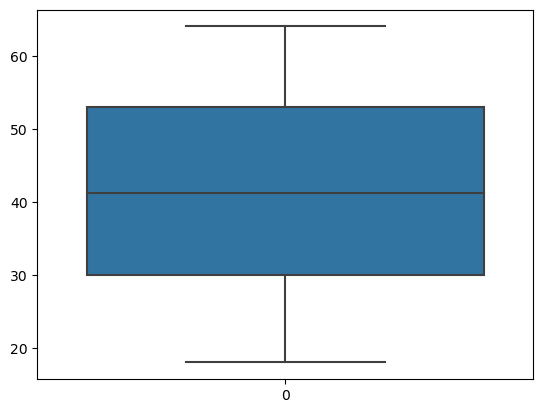

In [44]:
sns.boxplot(test['Age'])

<Axes: >

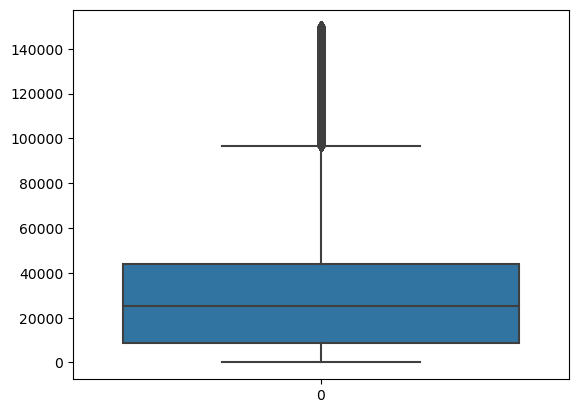

In [45]:
sns.boxplot(test['Annual Income'])

<Axes: >

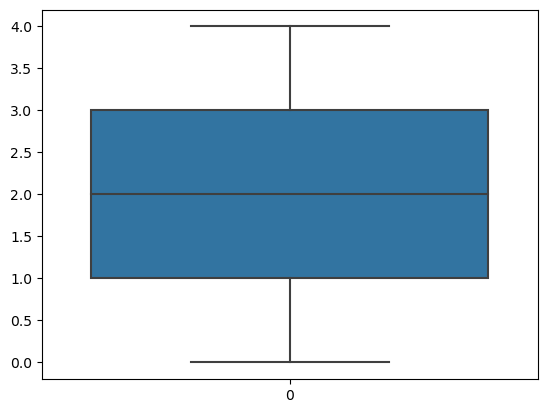

In [46]:
sns.boxplot(test['Number of Dependents'])

<Axes: >

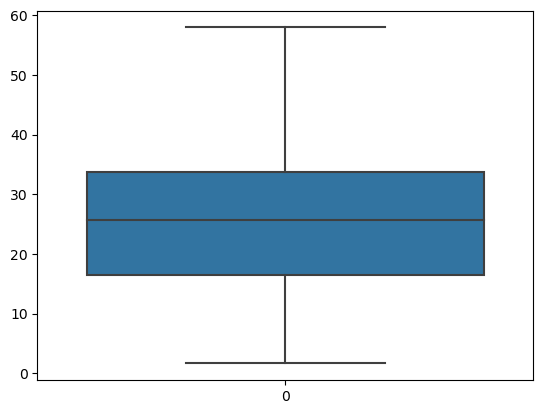

In [47]:
sns.boxplot(test['Health Score'])

<Axes: >

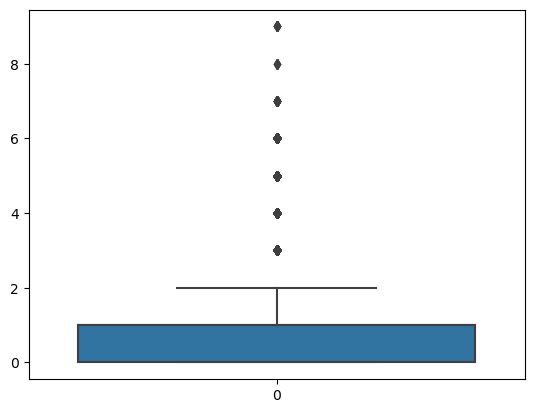

In [48]:
sns.boxplot(test['Previous Claims'])

<Axes: >

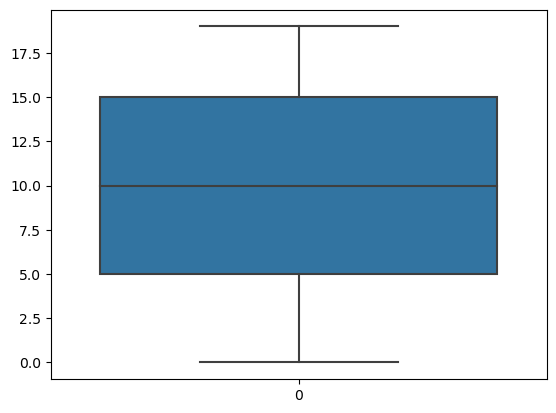

In [49]:
sns.boxplot(test['Vehicle Age'])

### Feature Engineering

In [18]:
train['Exercise Frequency'].unique()


array(['Weekly', 'Rarely', 'Daily', 'Monthly'], dtype=object)

In [27]:
Dict={}
lst=['Weekly','Monthly','Daily','Rarely']
for key,val in enumerate(lst):
    Dict[val]=key
print(Dict)

{'Weekly': 0, 'Monthly': 1, 'Daily': 2, 'Rarely': 3}


In [59]:
train.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Policy Start_Date
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.599,Urban,...,2.0,17.0,372.00000,5.0,Poor,No,Weekly,House,2869.0,2023-12-23
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,Self-Employed,15.570,Rural,...,1.0,12.0,694.00000,2.0,Average,Yes,Monthly,House,1483.0,2023-06-12
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.178,Suburban,...,1.0,14.0,592.92435,3.0,Good,Yes,Weekly,House,567.0,2023-09-30
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,Self-Employed,10.938,Rural,...,1.0,0.0,367.00000,1.0,Poor,Yes,Daily,Apartment,765.0,2024-06-12
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376,Rural,...,0.0,8.0,598.00000,4.0,Poor,Yes,Weekly,House,2022.0,2021-12-01


In [28]:
train['Exercise_Frequency']=train['Exercise Frequency'].map(Dict)

In [63]:
train.head(50)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Policy Start_Date,Exercise_Frequency
0,0,19.0,Female,10049.000000,Married,1.0,Bachelor's,Self-Employed,22.599,Urban,...,17.0,372.00000,5.0,Poor,No,Weekly,House,2869.0,2023-12-23,0.0
1,1,39.0,Female,31678.000000,Divorced,3.0,Master's,Self-Employed,15.570,Rural,...,12.0,694.00000,2.0,Average,Yes,Monthly,House,1483.0,2023-06-12,NaN
2,2,23.0,Male,25602.000000,Divorced,3.0,High School,Self-Employed,47.178,Suburban,...,14.0,592.92435,3.0,Good,Yes,Weekly,House,567.0,2023-09-30,0.0
3,3,21.0,Male,141855.000000,Married,2.0,Bachelor's,Self-Employed,10.938,Rural,...,0.0,367.00000,1.0,Poor,Yes,Daily,Apartment,765.0,2024-06-12,2.0
4,4,21.0,Male,39651.000000,Single,1.0,Bachelor's,Self-Employed,20.376,Rural,...,8.0,598.00000,4.0,Poor,Yes,Weekly,House,2022.0,2021-12-01,0.0
5,5,29.0,Male,45963.000000,Married,1.0,Bachelor's,Self-Employed,33.053,Urban,...,4.0,614.00000,5.0,Average,No,Weekly,House,3202.0,2022-05-20,0.0
6,6,41.0,Male,40336.000000,Married,0.0,PhD,Self-Employed,25.614,Rural,...,8.0,807.00000,6.0,Poor,No,Weekly,House,439.0,2020-02-21,0.0
7,7,48.0,Female,127237.000000,Divorced,2.0,High School,Employed,5.770,Suburban,...,11.0,398.00000,5.0,Average,No,Rarely,Condo,111.0,2022-08-08,3.0
8,8,21.0,Male,1733.000000,Divorced,3.0,Bachelor's,Self-Employed,17.870,Urban,...,10.0,685.00000,8.0,Average,No,Monthly,Condo,213.0,2020-12-14,NaN
9,9,44.0,Male,52447.000000,Married,2.0,Master's,Employed,20.474,Urban,...,9.0,635.00000,3.0,Poor,No,Daily,Condo,64.0,2020-08-02,2.0


In [29]:
test['Exercise_Frequency']=test['Exercise Frequency'].map(Dict)

In [71]:
test.head(50)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Policy Start_Date,Exercise_Frequency
0,1200000,28.0,Female,2310.000000,Single,4.0,Bachelor's,Self-Employed,7.658,Rural,...,1.0,19.0,592.904749,1.0,Poor,Yes,Weekly,House,2023-06-04,0.0
1,1200001,31.0,Female,126031.000000,Married,2.0,Master's,Self-Employed,13.381,Suburban,...,1.0,14.0,372.000000,8.0,Good,Yes,Rarely,Apartment,2024-04-22,3.0
2,1200002,47.0,Female,17092.000000,Divorced,0.0,PhD,Unemployed,24.355,Urban,...,1.0,16.0,819.000000,9.0,Average,Yes,Monthly,Condo,2023-04-05,NaN
3,1200003,28.0,Female,30424.000000,Divorced,3.0,PhD,Self-Employed,5.136,Suburban,...,1.0,3.0,770.000000,5.0,Poor,Yes,Daily,House,2023-10-25,2.0
4,1200004,24.0,Male,10863.000000,Divorced,2.0,High School,Unemployed,11.844,Suburban,...,1.0,14.0,755.000000,7.0,Average,No,Weekly,House,2021-11-26,0.0
5,1200005,43.0,Male,52370.000000,Married,2.0,Bachelor's,Self-Employed,5.386,Suburban,...,1.0,15.0,432.000000,2.0,Average,No,Rarely,Condo,2022-07-08,3.0
6,1200006,21.0,Female,5896.000000,Married,3.0,Master's,Self-Employed,14.774,Rural,...,1.0,14.0,321.000000,8.0,Good,No,Monthly,Condo,2023-11-12,NaN
7,1200007,44.0,Male,31855.000000,Divorced,3.0,Bachelor's,Self-Employed,20.848,Suburban,...,1.0,8.0,712.000000,1.0,Poor,Yes,Monthly,Apartment,2021-03-12,NaN
8,1200008,32.0,Female,76463.000000,Divorced,4.0,PhD,Self-Employed,22.989,Suburban,...,0.0,1.0,540.000000,2.0,Average,No,Weekly,Apartment,2021-07-08,0.0
9,1200009,48.0,Female,27982.000000,Married,2.0,High School,Self-Employed,43.567,Urban,...,1.0,15.0,757.000000,7.0,Good,Yes,Daily,House,2021-02-15,2.0


In [30]:
gender={'Female':0,'Male':1}

train['Gender_type']=train['Gender'].map(gender)

In [56]:
train.head(10)

,id,Age,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,...,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Property Type,Premium Amount,Policy Start_Date,Exercise_Frequency,Gender_type
0,0,19.0,10049.0,0,1.0,0,0,22.599,0,0,...,17.0,372.0,5.0,0,1,0,2869.0,2023-12-23,0,0
1,1,39.0,31678.0,1,3.0,1,0,15.570,1,1,...,12.0,694.0,2.0,1,0,0,1483.0,2023-06-12,1,0
2,2,23.0,25602.0,1,3.0,2,0,47.178,2,0,...,14.0,593.0,3.0,2,0,0,567.0,2023-09-30,0,1
3,3,21.0,141855.0,0,2.0,0,0,10.938,1,2,...,0.0,367.0,1.0,0,0,1,765.0,2024-06-12,2,1
4,4,21.0,39651.0,2,1.0,0,0,20.376,1,0,...,8.0,598.0,4.0,0,0,0,2022.0,2021-12-01,0,1
5,5,29.0,45963.0,0,1.0,0,0,33.053,0,0,...,4.0,614.0,5.0,1,1,0,3202.0,2022-05-20,0,1
6,6,41.0,40336.0,0,0.0,3,0,25.614,1,2,...,8.0,807.0,6.0,0,1,0,439.0,2020-02-21,0,1
7,7,48.0,127237.0,1,2.0,2,1,5.770,2,1,...,11.0,398.0,5.0,1,1,2,111.0,2022-08-08,3,0
8,8,21.0,1733.0,1,3.0,0,0,17.870,0,0,...,10.0,685.0,8.0,1,1,2,213.0,2020-12-14,1,1
9,9,44.0,52447.0,0,2.0,1,1,20.474,0,1,...,9.0,635.0,3.0,0,1,2,64.0,2020-08-02,2,1


In [57]:
test.head()

,id,Age,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Property Type,Policy Start_Date,Exercise_Frequency,Gender_type
0,1200000,28.0,2310.0,2,4.0,0,0,7.658,1,2,1.0,19.0,593.0,1.0,0,0,0,2023-06-04,0,0
1,1200001,31.0,126031.0,0,2.0,1,0,13.381,2,0,1.0,14.0,372.0,8.0,2,0,1,2024-04-22,3,0
2,1200002,47.0,17092.0,1,0.0,3,2,24.355,0,1,1.0,16.0,819.0,9.0,1,0,2,2023-04-05,1,0
3,1200003,28.0,30424.0,1,3.0,3,0,5.136,2,1,1.0,3.0,770.0,5.0,0,0,0,2023-10-25,2,0
4,1200004,24.0,10863.0,1,2.0,2,2,11.844,2,0,1.0,14.0,755.0,7.0,1,1,0,2021-11-26,0,1


In [31]:
test['Gender_type']=test['Gender'].map(gender)

In [32]:
marital_status={'Married':0,'Divorced':1,'Single':2}
train['Marital Status']=train['Marital Status'].map(marital_status)

In [33]:
test['Marital Status']=test['Marital Status'].map(marital_status)

In [97]:
train['Education Level'].unique()

array(["Bachelor's", "Master's", 'High School', 'PhD'], dtype=object)

In [34]:
edu_level={"Bachelor's":0,"Master's":1,'High School':2,'PhD':3}
train['Education Level']=train['Education Level'].map(edu_level)
test['Education Level']=test['Education Level'].map(edu_level)

In [101]:
train['Occupation'].unique()

array(['Self-Employed', 'Employed', 'Unemployed'], dtype=object)

In [35]:
occ={'Self-Employed':0,'Employed':1,'Unemployed':2}
train['Occupation']=train['Occupation'].map(occ)
test['Occupation']=test['Occupation'].map(occ)

In [106]:
train['Location'].unique()

array(['Urban', 'Rural', 'Suburban'], dtype=object)

In [36]:
location={'Urban':0,'Rural':1,'Suburban':2}
train['Location']=train['Location'].map(location)
test['Location']=test['Location'].map(location)

In [111]:
train['Policy Type'].unique()

array(['Premium', 'Comprehensive', 'Basic'], dtype=object)

In [37]:
poltype={'Premium':0,'Comprehensive':1,'Basic':2}
train['Policy Type']=train['Policy Type'].map(poltype)
test['Policy Type']=test['Policy Type'].map(poltype)

In [126]:
train['Customer Feedback'].unique()

array(['Poor', 'Average', 'Good'], dtype=object)

In [38]:
feedback={'Poor':0,'Average':1,'Good':2}
train['Customer Feedback']=train['Customer Feedback'].map(feedback)
test['Customer Feedback']=test['Customer Feedback'].map(feedback)

In [40]:
train['Smoking Status'].unique()

array(['No', 'Yes'], dtype=object)

In [39]:
smoke_status={'Yes':0,'No':1}
train['Smoking Status']=train['Smoking Status'].map(smoke_status)
test['Smoking Status']=test['Smoking Status'].map(smoke_status)

In [44]:
train['Property Type'].unique()

array(['House', 'Apartment', 'Condo'], dtype=object)

In [40]:
prop_type={'House':0,'Apartment':1,'Condo':2}
train['Property Type']=train['Property Type'].map(prop_type)
test['Property Type']=test['Property Type'].map(prop_type)

In [41]:
train=train.drop(columns=['Gender','Exercise Frequency'])
test=test.drop(columns=['Gender','Exercise Frequency'])

In [42]:
train['Credit Score']=round(train['Credit Score'],0)
test['Credit Score']=round(test['Credit Score'],0)


In [43]:
train['Policy Start_Date']=pd.to_datetime(train['Policy Start_Date'])
test['Policy Start_Date']=pd.to_datetime(test['Policy Start_Date'])


In [44]:
today=datetime.datetime.today()
today

datetime.datetime(2025, 1, 5, 16, 16, 47, 102017)

In [45]:
train['Time_Elapsed_between_Days']=(today-train['Policy Start_Date']).dt.days
test['Time_Elapsed_between_Days']=(today-train['Policy Start_Date']).dt.days

In [46]:
train=train.drop(columns=['Policy Start_Date'])
test=test.drop(columns=['Policy Start_Date'])


In [43]:
test.head()

,id,Age,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Property Type,Exercise_Frequency,Gender_type,Time_Elapsed_between_Days
0,1200000,28.0,2310.0,2,4.0,0,0,7.658,1,2,1.0,19.0,593.0,1.0,0,0,0,0,0,376
1,1200001,31.0,126031.0,0,2.0,1,0,13.381,2,0,1.0,14.0,372.0,8.0,2,0,1,3,0,570
2,1200002,47.0,17092.0,1,0.0,3,2,24.355,0,1,1.0,16.0,819.0,9.0,1,0,2,1,0,460
3,1200003,28.0,30424.0,1,3.0,3,0,5.136,2,1,1.0,3.0,770.0,5.0,0,0,0,2,0,204
4,1200004,24.0,10863.0,1,2.0,2,2,11.844,2,0,1.0,14.0,755.0,7.0,1,1,0,0,1,1128


In [43]:
test.isnull().sum()

id                           0
Age                          0
Gender                       0
Annual Income                0
Marital Status               0
Number of Dependents         0
Education Level              0
Occupation                   0
Health Score                 0
Location                     0
Policy Type                  0
Previous Claims              0
Vehicle Age                  0
Credit Score                 0
Insurance Duration           0
Customer Feedback            0
Smoking Status               0
Exercise Frequency           0
Property Type                0
Exercise_Frequency           0
Gender_type                  0
Time_Elapsed_between_Days    0
dtype: int64

In [44]:
print(train.shape)
print(test.shape)

(1200000, 21)
(800000, 20)


## Splitting the data

In [44]:
x_train=train.drop(columns=['Premium Amount'])
x_train=x_train.iloc[:20000]
y_train=train['Premium Amount']
y_train=y_train.iloc[:20000]


## Scaling

In [78]:
x_train.shape

(1200000, 20)

In [60]:
y_train.shape

(1200000,)

In [45]:
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)

In [48]:
x_test=test.iloc[:160000]
x_test=sc_x.fit_transform(x_test)

In [60]:
x_test.shape

(5000, 20)

In [69]:
x_train.shape

(5000, 20)

## Machine Learning

In [46]:
rf_regressor=RandomForestRegressor(n_estimators=400)

In [47]:
rf_regressor.fit(x_train,y_train)

RandomForestRegressor(n_estimators=400)

In [50]:
y_test_rf=rf_regressor.predict(x_test)

In [51]:
score2=rf_regressor.score(x_test,y_test_rf)

In [52]:
score2

1.0

In [53]:
x_test1=test.iloc[160000:320000]
x_test1=sc_x.fit_transform(x_test1)

In [54]:
y_test_rf1=rf_regressor.predict(x_test1)

In [55]:
x_test2=test.iloc[320000:480000]
x_test2=sc_x.fit_transform(x_test2)

In [56]:
y_test_rf2=rf_regressor.predict(x_test2)

In [57]:
x_test3=test.iloc[480000:640000]
x_test3=sc_x.fit_transform(x_test3)

In [58]:
y_test_rf3=rf_regressor.predict(x_test3)

In [59]:
x_test4=test.iloc[640000:800000]
x_test4=sc_x.fit_transform(x_test4)

In [60]:
y_test_rf4=rf_regressor.predict(x_test4)

## Submission

In [61]:
pred_Targ1=pd.DataFrame()
pred_Targ1['id']=test['id']
pred_Targ1

,id
0,1200000
1,1200001
2,1200002
3,1200003
4,1200004
...,...
799995,1999995
799996,1999996
799997,1999997
799998,1999998


In [62]:
predicted_Target=pd.DataFrame(y_test_rf)
predicted_Target

,0
0,1881.2750
1,1078.7075
2,1443.8650
3,1198.5700
4,1450.1200
...,...
159995,1875.7275
159996,1296.2900
159997,1296.5125
159998,1301.7925


In [63]:
predicted_Target.rename(columns={0:'Premium Amount'},inplace=True)

In [67]:
predicted_Target

,Premium Amount
0,1772.955
1,1098.130
2,1338.370
3,1246.235
4,1259.670
...,...
159995,1860.345
159996,1314.355
159997,1284.385
159998,1290.595


In [64]:
predicted_Target1=pd.DataFrame(y_test_rf1)
predicted_Target1

,0
0,1390.7400
1,1329.5300
2,1501.2675
3,1522.0550
4,1167.2850
...,...
159995,1044.8800
159996,1201.0575
159997,1271.2850
159998,1279.0425


In [65]:
predicted_Target1.rename(columns={0:'Premium Amount'},inplace=True)
predicted_Target1

,Premium Amount
0,1390.7400
1,1329.5300
2,1501.2675
3,1522.0550
4,1167.2850
...,...
159995,1044.8800
159996,1201.0575
159997,1271.2850
159998,1279.0425


In [66]:
predicted_Target2=pd.DataFrame(y_test_rf2)
predicted_Target2

,0
0,1364.3775
1,1316.3975
2,1146.6150
3,1377.2600
4,1442.6475
...,...
159995,1261.1900
159996,1504.3025
159997,1120.4525
159998,1788.4325


In [67]:
predicted_Target2.rename(columns={0:'Premium Amount'},inplace=True)

In [68]:
predicted_Target3=pd.DataFrame(y_test_rf3)
predicted_Target3

,0
0,1634.9850
1,1621.6675
2,1473.2925
3,1516.5550
4,1315.8450
...,...
159995,1437.5800
159996,1184.2450
159997,1353.7650
159998,1296.4475


In [69]:
predicted_Target3.rename(columns={0:'Premium Amount'},inplace=True)

In [70]:
predicted_Target4=pd.DataFrame(y_test_rf4)
predicted_Target4

,0
0,1138.7300
1,1626.8725
2,1663.6725
3,1227.1250
4,1548.3675
...,...
159995,1450.7475
159996,1786.7675
159997,1363.0925
159998,1755.8975


In [71]:
predicted_Target4.rename(columns={0:'Premium Amount'},inplace=True)

In [72]:
frames=[predicted_Target,predicted_Target1,predicted_Target2,predicted_Target3,predicted_Target4]
res=pd.concat(frames)

In [73]:
res

,Premium Amount
0,1881.2750
1,1078.7075
2,1443.8650
3,1198.5700
4,1450.1200
...,...
159995,1450.7475
159996,1786.7675
159997,1363.0925
159998,1755.8975


In [74]:
pred_Targ1['Premium Amount']=res['Premium Amount'].reset_index(drop=True)

In [75]:
pred_Targ1

,id,Premium Amount
0,1200000,1881.2750
1,1200001,1078.7075
2,1200002,1443.8650
3,1200003,1198.5700
4,1200004,1450.1200
...,...,...
799995,1999995,1450.7475
799996,1999996,1786.7675
799997,1999997,1363.0925
799998,1999998,1755.8975


In [77]:
pred_Targ1.to_csv('D://Kaggle competition//Submission1//Submission2.csv',header=True,index=False)